In [2]:
import torch
import numpy as np
%matplotlib inline

In [3]:
# テンソル
data = torch.tensor([[1,2],[3,5]])

print(data)
print(type(data))

tensor = torch.rand(2,4)
print(f'\ntensor: {tensor}')
print(f'dtype: {tensor.dtype}')
print(f'device: {tensor.device}')

if torch.cuda.is_available():
    print('GPUにテンソル移動')
    tensor = tensor.to('cuda')
    print(tensor)
else:
    print('GPU使えない')
    
ones = torch.ones(4,3)
print(f'ones {ones}')

zeros = torch.zeros(2,5)
print(f'zeros {zeros}')


t1 = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
t2 = torch.tensor([[0,1,0],[1,1,1],[2,2,2]])


print('---\n',t1,'\n', t2)

a = torch.cat([t1, t2], dim=1)
print(f'結合\n {a}')

a = t1 @ t2
print(f'行列の積\n {a}')

a = t1 * t2
print(f'要素ごとの積\n {a}')

tensor([[1, 2],
        [3, 5]])
<class 'torch.Tensor'>

tensor: tensor([[0.3170, 0.8280, 0.2644, 0.7829],
        [0.5113, 0.0526, 0.1545, 0.7829]])
dtype: torch.float32
device: cpu
GPUにテンソル移動
tensor([[0.3170, 0.8280, 0.2644, 0.7829],
        [0.5113, 0.0526, 0.1545, 0.7829]], device='cuda:0')
ones tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
zeros tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
---
 tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]) 
 tensor([[0, 1, 0],
        [1, 1, 1],
        [2, 2, 2]])
結合
 tensor([[1, 2, 3, 0, 1, 0],
        [4, 5, 6, 1, 1, 1],
        [7, 8, 9, 2, 2, 2]])
行列の積
 tensor([[ 8,  9,  8],
        [17, 21, 17],
        [26, 33, 26]])
要素ごとの積
 tensor([[ 0,  2,  0],
        [ 4,  5,  6],
        [14, 16, 18]])


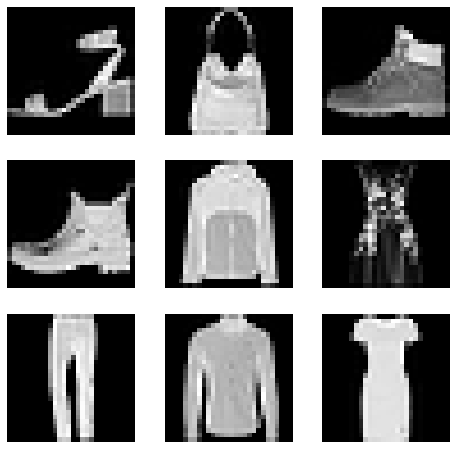

In [12]:
# データセット
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

# データ読み込み
train_data = datasets.FashionMNIST(
    root="data", # 訓練/テストデータが格納されているパス
    train=True,  # 訓練またはテスト 
    download=True,# rootにデータがない場合はインタネットからダウンロード
    transform=ToTensor(), # 特徴量とラベルの変換
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

fig = plt.figure(figsize=(8,8))
cols, rows = 3, 3
for i in range(1, cols*rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    fig.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [20]:
# ニューラルネットワークモデル
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# GPUが使えるなら使う
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

# クラス定義
class NeuralNetwork(nn.Module):
    
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        
        # torch.nn.Sequential 一方通行のモデルのためのクラス
        self.linear_relu_stack = nn.Sequential(
            # torch.nn.Linear 全結合層の定義
            # 入力は28*28をflattenした784次元
            nn.Linear(28*28, 512),
            # 活性化関数 ReLU 
            # 線形変換だけだとニューラルネットワークが複雑にならないので非線形関数を挟む
            nn.ReLU(),
            # 中間層
            nn.Linear(512, 512),
            nn.ReLU(),
            # 出力は10次元
            nn.Linear(512, 10),
            nn.ReLU(),
        )
    
    # 順伝搬の処理
    def forward(self, x):
        # 28*28のデータを1次元に変換
        x = self.flatten(x)
        # __init__で定義したSequentialの処理
        logits = self.linear_relu_stack(x)
        return logits

# インスタンス作成、GPU上に移動
model = NeuralNetwork().to(device)
print(model)

# 入力 28*28のテンソル
X = torch.rand(1, 28, 28, device=device)
# print(f'\ninput {X}')

# 出力 10次元のテンソル
logits = model(X)
print(f'\nlogits\n {logits}')

# softmax関数 出力要素が[0,1]の範囲で合計が1になるように変換
pred_probab = nn.Softmax(dim=1)(logits)
print(f'\npred_probab\n {pred_probab}')

# 最大値のインデックス
y_pred = pred_probab.argmax(1)
print(f'\ny_pred\n {y_pred}')


Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)

logits
 tensor([[0.0000, 0.0022, 0.0750, 0.0192, 0.0000, 0.0000, 0.0687, 0.0353, 0.0498,
         0.0568]], device='cuda:0', grad_fn=<ReluBackward0>)

pred_probab
 tensor([[0.0969, 0.0971, 0.1045, 0.0988, 0.0969, 0.0969, 0.1038, 0.1004, 0.1019,
         0.1026]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

y_pred
 tensor([2], device='cuda:0')
